# Decision Tree (Regression)

Import pakages yang diperlukan

In [20]:
# import package
import pandas as pd
import numpy as np

Membaca data

In [21]:
padi = pd.read_csv('finalProject.csv')
padi.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [22]:
padi = pd.get_dummies(padi)

In [23]:
padi.head()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
0,1993,1329536.0,323589.0,1627.0,82.00,26.06,1,0,0,0,0,0,0,0
1,1994,1299699.0,329041.0,1521.0,82.12,26.92,1,0,0,0,0,0,0,0
2,1995,1382905.0,339253.0,1476.0,82.72,26.27,1,0,0,0,0,0,0,0
3,1996,1419128.0,348223.0,1557.0,83.00,26.08,1,0,0,0,0,0,0,0
4,1997,1368074.0,337561.0,1339.0,82.46,26.31,1,0,0,0,0,0,0,0


Eksplorasi data

In [34]:
# Merangkum data
padi.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000,224.00000,224.00000,224.00000,224.00000,224.00000,224.00000,224.00000,224.00000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964,0.12500,0.12500,0.12500,0.12500,0.12500,0.12500,0.12500,0.12500
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041,0.33146,0.33146,0.33146,0.33146,0.33146,0.33146,0.33146,0.33146
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


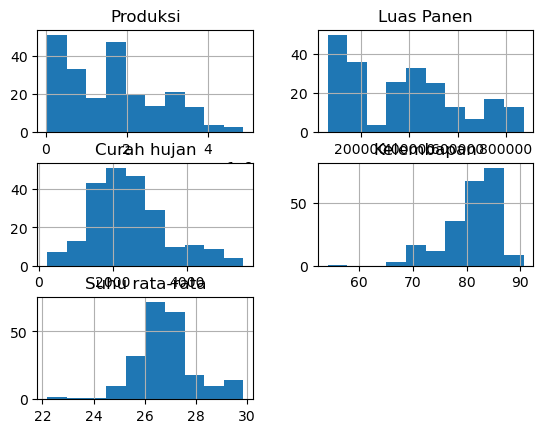

In [33]:
viz = padi[['Produksi','Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']]
viz.hist()
plt.show()

Pembuatan dataset pelatihan dan pengujian

In [24]:
X = padi.drop('Produksi', axis='columns')
y = padi['Produksi']

In [25]:
# Proses splitting dataset pelatihan dan pengujian
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

Pembuatan model

In [26]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

# Fit dt kedalam the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

Evaluasi

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [28]:
predictions = dt.predict(X_test)

In [29]:
# MSE (Mean Squared Error) 
mse = mean_squared_error (y_test, predictions)
print("MSE: %.2f"  % mse)

MSE: 226603240169.11


In [30]:
rmse = np.sqrt(mse)
print("RMSE: %.2f" % rmse)

RMSE: 476028.61


In [31]:
mae = mean_absolute_error (y_test, predictions)
print("MAE: %.2f" % mae)

MAE: 298263.09


In [32]:
r2 = r2_score(y_test, predictions)
print("Nilai R2-score:", round(r2, 4))
print("artinya variabel bebas dalam model dapat menjelaskan sebesar", round(r2*100,2), "% varibel terikat dalam model")

Nilai R2-score: 0.8516
artinya variabel bebas dalam model dapat menjelaskan sebesar 85.16 % varibel terikat dalam model
